# CHAPTER16 지도학습(분류) 기초

## 16.1 지도학습(분류) 알아보기

### 16.1.1 분류란

- 지도학습에는 회귀, 분류로 나누어진다


### 16.1.2 이항분류와 다항분류

- 이항분류 : 분류할 클래스가 두개. 
- 다항 분류 : 분류할 클래스가 세 개이상.

### 16.1.3 분류의 흐름

1. 데이터 전처리 - 데이터 가공, 수정
2. 학습 모델 선택 
3. 모델 학습 - 하이퍼파라미터 선택 및 튜닝
4. 모델 예측(추정) - 미지의 데이터로 모델 검증

### 16.1.4 데이터 준비하기

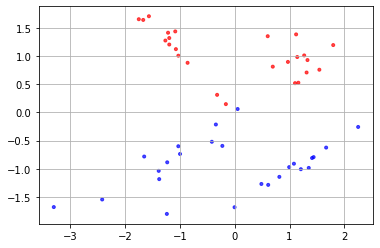

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib

X,y = make_classification(n_samples=50, n_features=2,n_redundant=0, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)
plt.grid(True)
plt.show()

### 16.1.5 학습과 예측

In [21]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

# 데이터를 학습용과 평가용으로 나누기
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 모델을 구축
model = LogisticRegression(random_state=42)

# train_X와 train_y로 모델을 학습
model.fit(train_X, train_y)

# test_X에 대한 모델의 분류 예측 결과
pred_y = model.predict(test_X)
print(pred_y)

[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


## 16.2 주요 기법 소개

### 16.2.1 로지스틱 회귀

- 직선으로 데이터의 카테고리를 그룹으로 나눌 수 있는 데이터를 선형 분리 가능한 데이터라 한다
- 로지스틱 회귀는 선형 분리 가능한 데이터의 경계선을 학습을 통해 찾고 데이터를 분류하는 방법
- 경계선이 직선이라는 특징때문에 이항 분류에 사용된다
- 데이터가 클래스로 분류될 확률을 계산하는 것도 가능하다
- 단점에는 데이터가 선형분리되지 않으면 분류할 수 없으며 일반화 능력이 낮은 것 등이 존재한다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


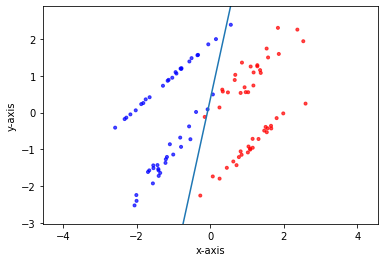

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np


X,y = make_classification(n_samples=100, n_features=2,n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


plt.scatter(X[:,0], X[:,1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

Xi = np.linspace(-10,10)
Y = -model.coef_[0][0] / model.coef_[0][1] *  Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi,Y)

plt.xlim(min(X[:,0]) - 0.5, max(X[:,0]) + 0.5)
plt.ylim(min(X[:,1]) - 0.5, max(X[:,1]) + 0.5)
plt.axes().set_aspect('equal', 'datalim')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

### 16.2.2 선형 SVM

- 로지스틱 회귀처럼 데이터의 경계선을 찾아 데이터를 분류하는 방법
- 서포트 벡터라는 주요 특징이 있다
- 서포트 벡터 : 각 클래스의 경계선에 가장 가까이 있는 데이터 및 경계선의 거리(거리를 나타내는 벡터)
- 이 서포트 벡터 거리 합을 최대화함으로 경계선을 결정한다

In [5]:
from sklearn.svm import LinearSVC

X,y = make_classification(n_samples=100, n_features=2,n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

model = LinearSVC()

model.fit(X_train, y_train)

model.score(X_test, y_test)

1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


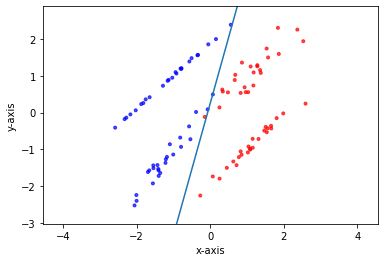

In [6]:

plt.scatter(X[:,0], X[:,1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

Xi = np.linspace(-10,10)
Y = -model.coef_[0][0] / model.coef_[0][1] *  Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi,Y)

plt.xlim(min(X[:,0]) - 0.5, max(X[:,0]) + 0.5)
plt.ylim(min(X[:,1]) - 0.5, max(X[:,1]) + 0.5)
plt.axes().set_aspect('equal', 'datalim')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

### 16.2.3 비선형 SVM

- 선형 SVM은 방향성을 세우기 쉽고 일반화하기도 좋은 모델이지만 입력 데이터가 선형 분리되지 않으면 사용할 수 없는 단점이 있다
- 비선형 SVM은 이런 결점을 보완하고자 나온 모델이다

In [11]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC

data, label = make_gaussian_quantiles(n_samples=1000, n_classes=2, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=42)

model1 = SVC()
model2 = LinearSVC()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

print(f'SCV Score : {model1.score(X_test, y_test)}')
print(f'LinearSVC Score : {model2.score(X_test, y_test)}')

SCV Score : 0.976
LinearSVC Score : 0.528


### 16.2.4 결정 트리

- 결정 트리는 로지스틱 회귀, SVM과 달리 데이터 요소(독립변수) 각각을 주목한다
- 요소 내의 값을 경계로 데이터를 분할하여 데이터가 속하는 클래스를 결정하는 방법
- 결정 트리에서는 각 독립변수가 종속변수에 얼마나 영향을 미치는지 볼 수 있다
- 단점으로는 선형 분리 가능한 데이터를 받아들이기 힘든점, 학습이 지도 데이터에 치우치는 점(일반화되지않음) 등이 있다

In [23]:
from sklearn.tree import DecisionTreeClassifier

data, label = make_classification(n_samples=100, n_classes=2, n_redundant=0, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.96

In [17]:
import requests
import zipfile
from io import StringIO
import io
import pandas as pd

# 데이터의 전처리에 필요한 패키지를 import
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# url을 지정
mush_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

# 데이터 형식을 변환
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

# 데이터에 이름을 붙이기(데이터를 쉽게 취급하기 위해)
mush_data.columns = ["classes", "cap_shape", "cap_surface",
                     "cap_color", "odor", "bruises",
                     "gill_attachment", "gill_spacing",
                     "gill_size", "gill_color", "stalk_shape",
                     "stalk_root", "stalk_surface_above_ring",
                     "stalk_surface_below_ring",
                     "stalk_color_above_ring",
                     "stalk_color_below_ring",
                     "veil_type", "veil_color","ring_number",
                     "ring_type", "spore_print_color",
                     "population", "habitat"]

# 카테고리 변수(색상의 종류 등 숫자의 크고 작음을 결정할 수 없는 것)을 더미 특징량(yes 또는 no)으로 변환
mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])

# 목적 변수: flg(플래그)를 세우기
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x: 1 if x == "p" else 0)

# 설명 변수와 목적 변수를 지정
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

# 학습 데이터와 테스트 데이터로 나누기
train_X, test_X, train_y, test_y = train_test_split(X,Y, random_state=42)

# 문제 - 모델 읽어와서 구축, 학습시키기

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(train_X, train_y)

model.score(test_X, test_y)

0.9094042343673068

### 16.2.5 랜덤 포레스트

- 결정 트리의 단순 버젼을 여러개 만들어 분류 결과를 다수결로 결정하는 앙상블 학습의 일종
- 결정 트리에서 독립변수를 모두 사용하는 것과 달리 랜덤 포레스트는 각 결정 트리는 랜덤으로 정해진 소수의 독립변수만 사용해 데이터가 속하는 클래스를 결정한다. 그 후 다수의 간이 결정 트리에서 출력된 클래스 중 가장 많았던 클래스를 결과로 출력한다
- 다수의 분류기를 통해 다수결로 결과를 출력하기 때문에 빗나간 값에 의해 예측 결과가 좌우되기 힘들다는 특징이 있다
- 단점으로는 결정트리와 같이 독립변수의 수에 대한 데이터수가 적으면 결정 트리가 분할되지 않아서 예측의 정확도가 떨어진다는 것이다

In [22]:
from sklearn.ensemble import RandomForestClassifier


data, label = make_classification(n_samples=100, n_classes=2, n_redundant=0, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

model.score(X_test,y_test)

0.96

### 16.2.6 K-NN

- k-최근접 이웃 알고리즘
- 예측할 데이터와 유사한 데이터 몇개를 찾아내 다수결로 분류결과를 결정하는 방법
- 학습 비용이 0이며 알고리즘이 단순한 편이고 높은 예측 정확도가 잘 나오는점, 복잡한 모양의 경계선도 표현하기 쉽다는 장점이 있다
- 하지만 분류기로 지정한 자연수 k를 많이 늘리면 식별 범위의 평균화가 진행되어 예측 정확도가 저하되고 지도 및 예측 데이터가 많아지면 계산량이 증가해 느린 알고리즘이 된다는 단점이 있다

In [24]:
from sklearn.neighbors import KNeighborsClassifier

data, label = make_classification(n_samples=100, n_classes=2, n_redundant=0, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=42)

model = KNeighborsClassifier()

model.fit(X_train, y_train)

model.score(X_test,y_test)

1.0

In [38]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_list = {'로지스틱 회귀' : LogisticRegression(),
              '선형 SVM' : LinearSVC(),
              '비선형 SVM' : SVC(),
              '결정 트리' : DecisionTreeClassifier(),
              '랜덤 포레스트' :RandomForestClassifier()}

for model_name, model in model_list.items():
    # clf = model
    model.fit(X_train, y_train)
    print(model_name)
    acc = model.score(X_test, y_test)
    print('정확도 : ' + str(acc))
    print()

로지스틱 회귀
정확도 : 0.96

선형 SVM
정확도 : 0.955

비선형 SVM
정확도 : 0.965

결정 트리
정확도 : 0.95

랜덤 포레스트
정확도 : 0.97

